<h1><center>Titanic: A complete project from scratch: Data analysis, visualization, and modeling</center></h1>
<center><img src="https://www.rd.com/wp-content/uploads/2019/08/auction-of-titanic-travel-brochures-wiltshire-uk-apr-2017-e1567006087133-760x506.jpg"></center>


<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

    
    
* [Problem Description](#1)
* [Explanatory Data Analysis (EDA)](#2)
    - [New feature (Title)](#21)
    - [Missing Values](#22)
        - [Cabin](#221)
        - [Embarked and Fare](#222)
        - [Age](#223)
    - [Exploring features](#23)
        - [Sex](#231)
        - [Ticket class (Pclass)](#232)
        - [Number of Siblings/Spouses](#233)
        - [Number of Parents/Children](#234)
        - [Embarked](#235)
        - [Fare](#236)
        - [Ticket, Name, PassengerID](#237)
* [Training](#3)
    - [Defining our classifiers](#31)
        - [Logistic Regression (from scratch)](#311)
        - [Least Square Ridge Classifier (from scratch)](#312)
        - [Preprocess](#313)
        - [Train and validate (KFold)](#314)
    - [Scikit-learn models](#32)
        - [Hyperparameter tuning](#321)
        - [Random Forest Classifier](#322)
        - [Logistic Regression Classifier](#323)
        - [XGBoost Classifier](#324)
    - [Deep Neural Network with Keras](#33)
    - [Voting Classifier](#34)
* [Summary](#4)


<a id="1"></a>

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center>Problem Description</center></h2>
    
The dataset in this project is called "Titanic: Machine Learning from Disaster". There are some information from the passengers such as age, sex, fare and survival. The dataset consists of different types of variables such as numerical integer, float, categorical and strings. Furthermore, some features have missing values.  

Different libraries will be used to perform explatory data analysis and visulaization such as Pandas, numpy, matplotlib and seaborn. A Logistic Regression and a Least Square Ridge classifier will be implemented from scracth to model the data.

The goal of this project is to investigate different data wrangling approaches to gereneate a decent dataset from raw data, and then train a classifier to predict the survival of Titanic passengers. 

It should be noted that the project is not investigating a causal relationship between features (sex, age, etc.) and the target (survival), but only the predictive power of such features. Can this data reveal some information about the culture of that era? For example, is it true that Victorain era people would let the women, children, and elderly on to lifeboats first? Let's figure this out :)

<a id="2"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center>Explanatory Data Analysis (EDA)</center></h2>
In this section, we first merge the training data and test data to show the complete dataset. In the table below, a summary of full data is displayed as well as some information and statistics about the data. For example, we can see the minimum age of passengers was 0.17 (8 weeks). (It is interesting to mention that Elizabeth Gladys 'Millvina' Dean was the youngest survivor of Titanic who died last among all passengers (at age of 97). We can see the most expensive ticket was 512 pounds! It was bought by Mrs James Warburton Martinez Cardeza (Charlotte Wardle Drake) for three cabins of B51, B53 and B55. Why did she book three seats? Wait, there is another person with the same cabin number and fare. Mr. Thomas Drake Martinez  Cardeza. The parch feature shows the number of parents or childern aboard. Since both have 1 in this feature and the age of Thomas is less than Charlotte, we can say Thomas was her son. There is another person who paid the same fare, it was for their servant Miss Anna ward. Hopefully, they all survived. 

Anyway, in the figure below, we can see the missing values of each feature. For example, we can see the cabin feature has a lot of missing values. For example, the cabin feature of Miss Anna Ward is missing, but we know now it should be B51, B53 and B55.

We can also see the number of missing values of each feature below the figure. 

In [1]:
# Importing useful libararies

import warnings
warnings.filterwarnings("ignore")

import numpy as np  
import pandas as pd    
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from time import time

Titanic Dataset Summary:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Stats of some features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


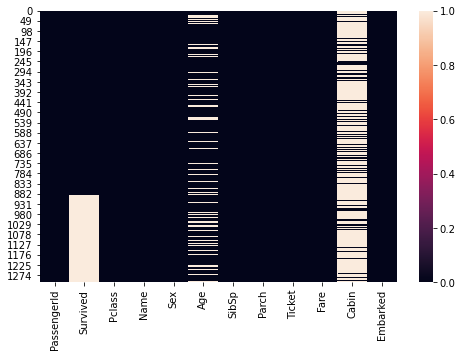

Number of missing values in 1309 examples


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")     #Loading train data
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")      #Loading test data
df_sample_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")  #Loading sample submission data

df_all = df_train.append(df_test, ignore_index=True)     # Merging df_train and df_test dataframes

print("Titanic Dataset Summary:")
display(df_all.head())

print("Stats of some features:")
display(df_all.describe())

print(df_all.info())

plt.figure(figsize=(8,5))
sns.heatmap(df_all.isnull())                     # Heatmap of missing values
plt.show()

m = df_all.shape[0]
print('Number of missing values in',m, 'examples')
display(df_all.isnull().sum())           # Number of missing values


Please note that the Survival (target) missing values are because of the test dataset.

<a id="21"></a>

## New feature (Title)

Should we ignore the names? I would say no, because we can extract the titles from the names. Based on <a href="https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9">this post</a>, we extract the titles and generlize them into six categories of Mr, Master, Miss, Mrs, Officer and Royalty. For example, anyone with title of Sir, or Don, or Lady is considered a royalty. 
We can see the number of each category below.

In [3]:
# creating a new feature (Title) by extracting title from the Name feature

df_all['Title'] = df_all.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
display(df_all.Title)
new_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

df_all.Title = df_all.Title.map(new_titles)
display(df_all.Title.value_counts())


0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

<a id="22"></a>

## Missing Values

We showed earlier that there are 263 missing values for age, 1014 for cabin, 2 for embarked and 1 for fare among all 1308 examples. Let's see how we can address this issue. 
<a id="221"></a>
### Cabin
Are cabin numbers important? Yes they can be. Some would say cabin numbers show the place of deck, and higher decks were closer to lifeboats. However, we have almost 80 percent missing data in cabin numbers. Let's do something simpler, create a new feature and assign 1 to whoever had a cabin number and zero to whoever didn't. Let's see how many of those with cabin number survived and how many of them had ticket class of 1, 2 or 3.


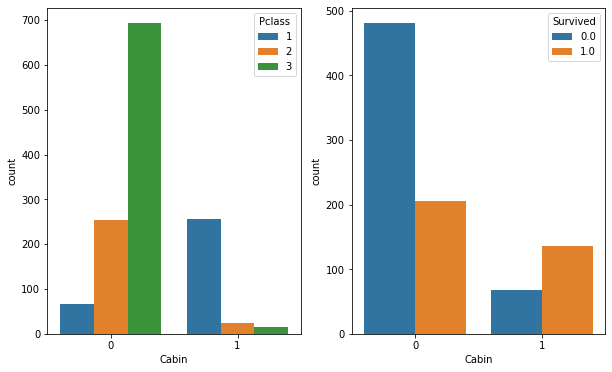

In [4]:
df_all.Cabin = df_all.Cabin.fillna(0)
for i in range(len(df_all.Cabin)): 
  if df_all.Cabin[i] != 0:
    df_all.Cabin[i] = 1
fig, axes = plt.subplots(1,2,figsize=(10,6))
sns.countplot(df_all.Cabin, hue=df_all.Pclass, ax= axes[0])
sns.countplot(df_all.Cabin, hue=df_all.Survived, ax= axes[1])
plt.show()

Well, it seems having a cabin number is correlated with having a higher class ticket and also having higher survival! Most of the examples with cabin numbers had P-class of 1, and most of the people without cabin numbers are died. So we are going to keep this new feature. 

<a id="222"></a>
### Embarked and Fare
There are only two missing values of embarked and Fare. We will fill the missing values for Embarked with the most frequent one, and use median for the one fare missing value. 

In [5]:
most_embarked = df_all.Embarked.value_counts().index[0]
df_all.Embarked = df_all.Embarked.fillna(most_embarked)
df_all.Fare = df_all.Fare.fillna(df_all.Fare.median())


<a id="223"></a>
### Age
There is about 20% missing value in Age. For sure, we are not going to discard age feature. We can fill the missing values with mean or median or something a bit more complex! Let's first see how is the distribution of our age parameter. The plot below shows how many of each sex survived in different age ranges. It also shows the overal distribution of age parameter. The distribution seems almost the same, however, we can see women had higher chance of survival in almost every age range. 

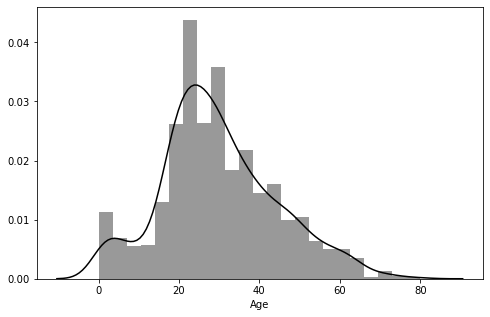

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


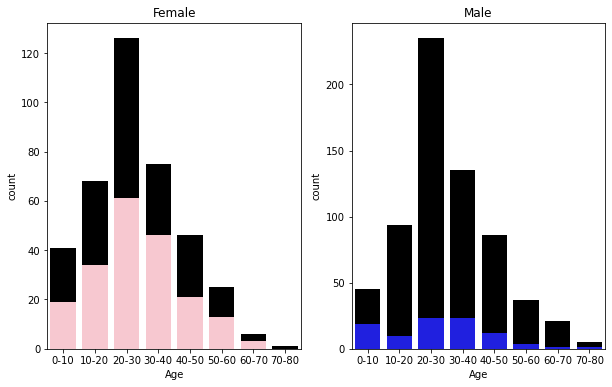

In [6]:
plt.figure(figsize=(8,5))
sns.distplot(df_all["Age"] ,color='black')
plt.show()
print(df_all.Age.describe())
Age_cat = pd.cut(df_all.Age,bins=[0,10,20,30,40,50,60,70,80],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])

fig, axes = plt.subplots(1,2, figsize = (10,6))
sns.countplot(Age_cat[(df_all.Sex=='female')],color= 'black',ax =axes[0])
sns.countplot(Age_cat[(df_all.Survived ==1) & (df_all.Sex=='female')],color='pink',ax =axes[0]).set_title('Female')
sns.countplot(Age_cat[(df_all.Sex=='male')],color= 'black',ax =axes[1])
sns.countplot(Age_cat[(df_all.Survived ==1) & (df_all.Sex=='male')],color='blue', ax =axes[1]).set_title('Male')
plt.show()

Ok, we plotted the age range with respect to differnet sexes and survival. How about other features? Next, we will group the age variable with respect to sex, Pclass, and Title. We can see the median age for people in each group is different. For example, The median age for a Miss in Pclass of 3 is 18, while the median age for a male officer in Pclass of 1 is 52. Therefore, instead of filling out all the missing values with only one median, it makes better sense to fill the missing values of each person with respect to her title, gender, and Pclass. 


Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

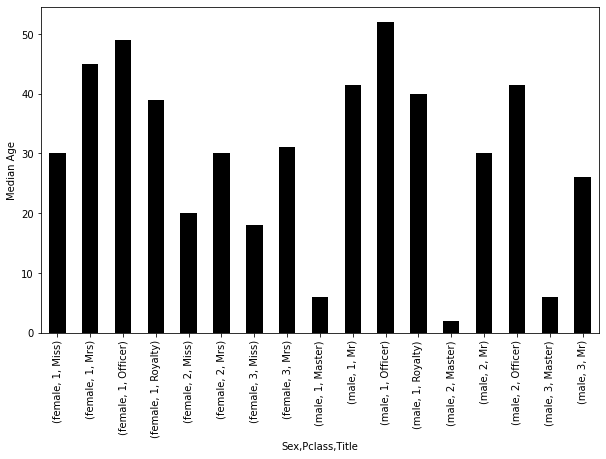

In [7]:
grouped = df_all.groupby(['Sex','Pclass', 'Title'])  
display(grouped.Age.median())
plt.figure(figsize= (10,6))
ax = grouped.Age.median().plot(kind='bar',color= 'black' )
ax.set(ylabel = 'Median Age')
plt.show()


In [8]:
df_all.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

Ok, now let's check the number of missing values once more.


In [9]:
print('Number of missing values in',m, 'examples')
display(df_all.isnull().sum())

Number of missing values in 1309 examples


PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64

There are no more missing values in our dataset. 418 missing survival is coming from the test where we do not have the labels. Survival will be used as a target vector to train our algorithms (not input). 

<a id="23"></a>

## Exploring Some more features

Now we filled all the missing values. Let's see what is the effect of each feature on survival.

<a id="231"></a>
### Sex

Based on the figure below, we can see the majority of women survived while the majority of men died. 

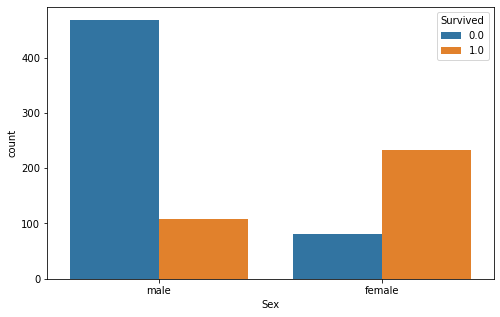

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Sex, hue=df_all.Survived)
plt.show()

<a id="232"></a>

### Ticket class (Pclass)

In the figure below, we can see the majority of people having class 3 ticket died while people with class 1 ticket survived the most. 

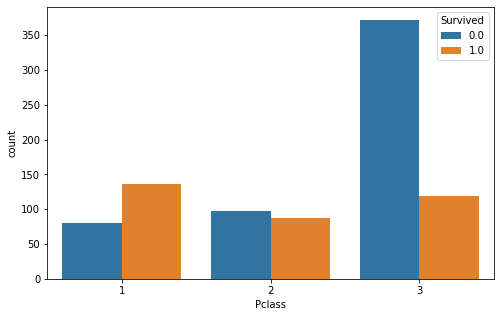

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Pclass, hue=df_all.Survived)
plt.show()

<a id="233"></a>

### Number of Siblings/Spouses

In this figure we can see that the ones who survived most were people who had one sibling or spouse aboard the titanic. 

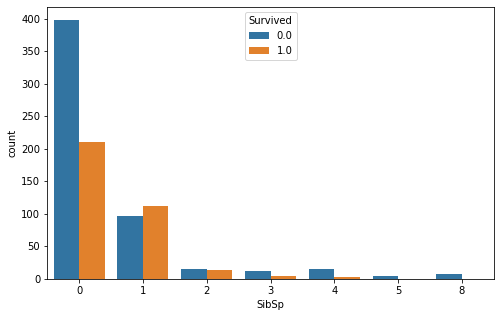

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.SibSp, hue=df_all.Survived)
plt.show()

<a id="234"></a>

### Number of Parents/Children

Well, it seems having someone with you is not bad at all!

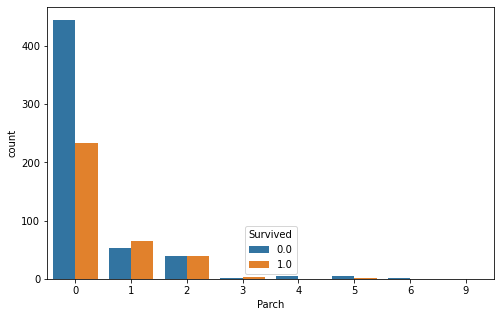

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Parch, hue=df_all.Survived)
plt.show()

<a id="234"></a>

### Title

As mentioned before, we extracted titles from the names of passengers. Well, it seems many gentlemen sacrified their lives to respect women, children and royalty members. 

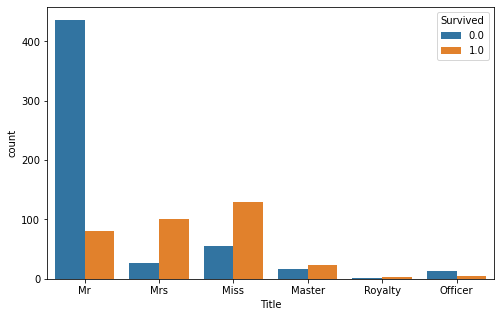

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Title, hue=df_all.Survived)
plt.show()

<a id="235"></a>


### Embarked

It seems people who chose Cherbourg as their port of embrakation were luckier than the other two ports. 

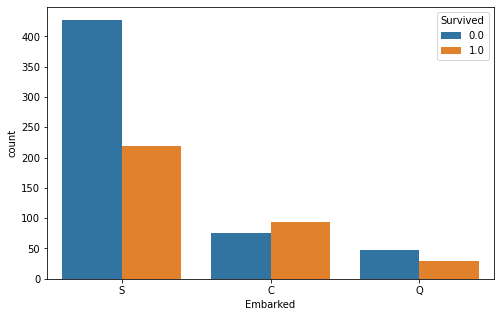

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(df_all.Embarked, hue=df_all.Survived)
plt.show()

<a id="236"></a>
### Fare

We devided the fares into different ranges. As we can see, the ones who paid more, survived more. 

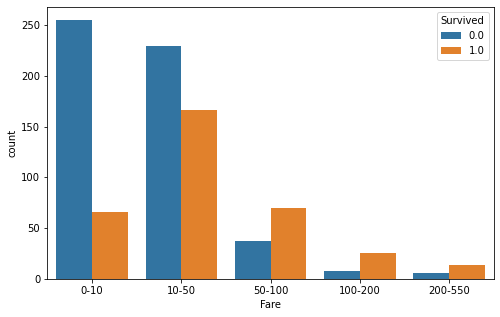

In [16]:
Fare_cat = pd.cut(df_all.Fare,bins=[0,10,50,100,200,550],labels=['0-10','10-50','50-100','100-200','200-550'])

plt.figure(figsize=(8,5))
sns.countplot(Fare_cat, hue=df_all.Survived)

plt.show()

<a id="237"></a>

### Ticket, Name, PassengerID

We used Name to extract the titles, now we can drop the three features of Ticket, name and PassengerID. 

In [17]:

df_all.drop('Name', axis =1, inplace=True)
df_all.drop('Ticket', axis =1, inplace=True)
df_all.drop('PassengerId', axis=1, inplace = True)
display(df_all)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,0,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,1,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,0,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,1,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,0,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,26.0,0,0,8.0500,0,S,Mr
1305,NaN,1,female,39.0,0,0,108.9000,1,C,Royalty
1306,NaN,3,male,38.5,0,0,7.2500,0,S,Mr
1307,NaN,3,male,26.0,0,0,8.0500,0,S,Mr


<a id="3"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center> Training</center></h2>


Let's look at our data now: A few more things before training. We need to convert categorical values to numericals. For sex, we assign 0,1 to male and female respectively. For Embarked,and Title we use one-hot encoding for these categorical features. Also, we add the SibSp and Parch together to make a new feature "Partner".

In [18]:
display(df_all.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,0,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,1,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,0,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,1,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,0,S,Mr


In [19]:
Sex = {"male": 0, "female":1}
df_all["Sex"] = df_all.Sex.map(Sex)
df_all['Partner'] = df_all['SibSp'] + df_all['Parch'] # 
df_all.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df_all = pd.get_dummies(df_all, columns = ['Title','Embarked'])
display(df_all.head())

,Survived,Pclass,Sex,Age,Fare,Cabin,Partner,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,7.2500,0,1,0,0,1,0,0,0,0,0,1
1,1.0,1,1,38.0,71.2833,1,1,0,0,0,1,0,0,1,0,0
2,1.0,3,1,26.0,7.9250,0,0,0,1,0,0,0,0,0,0,1
3,1.0,1,1,35.0,53.1000,1,1,0,0,0,1,0,0,0,0,1
4,0.0,3,0,35.0,8.0500,0,0,0,0,1,0,0,0,0,0,1


<a id="31"></a>

## Defining our classifiers

<a id="311"></a>

### Logistic Regression (from scratch)
One interpretation of binary Logistic Regression (LR) is that it learns the conditional distribution $P[Y = y | x]$ and then uses this model to estimate the Bayes classifier. In particular, LR assumes that 
\begin{equation*}
    P[Y = y | x, w] \approx \sigma(w^{T}x)  
\end{equation*}
where
\begin{equation*}
    \sigma(t) = \frac{1}{1 + e^{-t}}
\end{equation*}
is called the sigmoid or logistic function. We can see that $\sigma(w^{T}x) \in [0,1]$ and goes to 1 when $w^{T}x$ is large and 0 when $w^{T}x$ is small. The vector $w$ can be obtained using maximum likelihood estimation, i.e., minimizing the negative log-likelihood:
\begin{equation}
    \label{eq:lrML}
    J(w) = -\frac{1}{m} \sum_{i=1}^{m} y_{i} \log\left( \sigma(w^{T}x_{i}) \right) + (1-y_{i}) \log\left(1 - \sigma(w^{T}x_{i}) \right)
\end{equation}


In [20]:
# Logistic Regression from scratch

def logistic_regression(X, y, alpha=1e-3, num_iter=30,random_state=42):
    
    np.random.seed(random_state) # Random_state
    d, m = X.shape 
    K = np.max(y) + 1
    w = np.random.randn(d, K)
    
    def softmax(x):
        s = np.exp(x) / np.sum(np.exp(x))
        return s
    
    def one_hot(y, k):  
        y_one_hot = np.eye(k)[y]
        return y_one_hot
    
    def h(x, w):
        p = softmax(w.T @ x)     #Using softmax for multiclass classification
        return p
    
    def cost(pred, y):
        c = np.sum(- one_hot(y, K).T * np.log(pred))
        return c

    def grad(w, x, y):
        Y = one_hot(y, K).T
        b = h(x, w) - Y
        b = np.reshape(b, (-1, 1))
        x = x.reshape(-1, 1)
        g = x @ np.reshape(b, (-1, 1)).T
        return g

    for i in range(num_iter):
        id = np.random.permutation(m)
        for j in id:
            gradient = grad(w, X[:, j], y[j])
            w -= alpha * gradient
    return w


<a id="312"></a>

### Least Square Ridge Classifier (from scratch)

Considering $X \in R^{m \times d}$ and  $Y \in R^{m \times K}$ ($m$ is number of training examples, $d$ is the feature size, and $K$ is the number of target classes), there is a closed-form solution:
        \begin{equation*}
            J(w) = \lVert{X{w} - Y}\rVert_{2}^{2}+ \lambda \lVert{w}\rVert_{F}^{2}
        \end{equation*}
        \begin{equation*}
           = (X{w}  - Y)^T(X{w} -Y) + \lambda{w^T{w}}
        \end{equation*}
        \begin{equation*}
           = (w^{T}X^{T} - Y^T)(X{w} -Y) + \lambda{w^T{w}}
        \end{equation*}
        \begin{equation*}
           = w^{T}X^{T}X{w}-w^{T}X^{T}{Y}-Y^{T}{X}{w} +Y^{T}Y + \lambda{w^T{w}}
        \end{equation*}
To minimize: $ \frac{\partial J}{\partial w} = 0$
        \begin{equation*}
           \frac{\partial J}{\partial w} = 2X^{T}Xw-2X^{T}Y+2\lambda{w} = 0 \rightarrow 2(X^{T}X+\lambda{I})w=2X^{T}Y
        \end{equation*}
        \begin{equation*}
        \Rightarrow w = (X^{T}X+\lambda{I})^{-1}X^{T}Y
        \end{equation*}
  

In [21]:
# Least square ridge classifier
def ridge_classifier(X, y, lambd=1e-4):
    d, m = X.shape
    k = np.max(y) + 1
    w = np.linalg.inv(X @ X.T + lambd * np.eye(d)) @ X @ np.eye(k)[y]
    return w

In [22]:
def error(X, y, w):
    m = np.shape(y)
    y_pred = w.T @ X
    y_pred = np.argmax(y_pred, axis=0)
    err = np.sum(y_pred == y) / m
    return err

<a id="313"></a>

### Preprocess

Here we chose our final features by trial and error. In the next step, we normalized our features to be in range of zero and one.


In [23]:
mms = MinMaxScaler()

X = df_all.drop('Survived', axis=1).iloc[:891].values
y = (df_all["Survived"].iloc[:891].values).astype(int)
X = mms.fit_transform(X)
X_test = df_all.drop('Survived', axis=1).iloc[891:].values
X_test = mms.fit_transform (X_test)

<a id="314"></a>

### Train and validate (KFold)

KFold is an appropriate method to perfrom cross-validation. We use 5 folds, meaning each time, training on 4 parts and testing on the remaining part.

In [24]:

scores_lr = []
scores_ls = []
fold =1

for tr, val in KFold(n_splits=5, random_state=42).split(X,y):
    X_train = X[tr]
    X_val = X[val]
    y_train = y[tr]
    y_val = y[val]
    best_W_LR = logistic_regression(X_train.T, y_train, alpha=1e-3, num_iter=300,random_state=42)
    val_acc_LR = error(X_val.T, y_val, best_W_LR)
    scores_lr.append(val_acc_LR)
    print(f'Validation acc LR: Fold {fold}:', val_acc_LR)
    W_LS = ridge_classifier(X_train.T, y_train, lambd=1e-4)
    val_acc_LS = error(X_val.T, y_val, W_LS)
    scores_ls.append(val_acc_LS)
    print(f'Validation acc LS: Fold {fold}:', val_acc_LS)
    fold +=1 

print('-------------------------------')
print("Accuracy Logistic Regression: %0.2f (+/- %0.2f)" % (np.mean(scores_lr), np.std(scores_lr) * 2))
print("Accuracy Least Squares Ridge: %0.2f (+/- %0.2f)" % (np.mean(scores_ls), np.std(scores_ls) * 2))



Validation acc LR: Fold 1: [0.83798883]
Validation acc LS: Fold 1: [0.81564246]
Validation acc LR: Fold 2: [0.83146067]
Validation acc LS: Fold 2: [0.83146067]
Validation acc LR: Fold 3: [0.82022472]
Validation acc LS: Fold 3: [0.80898876]
Validation acc LR: Fold 4: [0.79213483]
Validation acc LS: Fold 4: [0.79213483]
Validation acc LR: Fold 5: [0.87640449]
Validation acc LS: Fold 5: [0.89325843]
-------------------------------
Accuracy Logistic Regression: 0.83 (+/- 0.05)
Accuracy Least Squares Ridge: 0.83 (+/- 0.07)


In [25]:
# Ridge Classifier prediction on test set

y_preds_LS =  (np.argmax(W_LS.T @ X_test.T, axis=0)).astype(int)
df_sample_sub.loc[:, 'Survived'] = y_preds_LS
df_sample_sub.to_csv('submission0.csv', index=False)
display(df_sample_sub.head())
# LB score: 0.77033

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


On average, our logistic regression and least square ridge classifiers have an 83%, and 82% accuracy within 95% confidence interval. Not bad!

<a id="32"></a>

## Scikit-learn models

Let's try sklearn built-in classifiers. We will use Logistic Regression (LR), RandomForest(RF), XGBoost(XGB) and Support vector machine (SVC). In this step, we are not using any hyperparameter tuning.

In [26]:
def test_clfs(clfs):
    for clf in clfs:
        print('------------------------------------------')
        start = time()
        clf = clf(random_state=42)
        scores = cross_val_score(clf, X, y, cv=5)
        print(str(clf), 'results:')
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        end = time()
        print('Processing time', end-start,'s')
    

models = [RandomForestClassifier, LogisticRegression,XGBClassifier]
test_clfs(models)


------------------------------------------
RandomForestClassifier(random_state=42) results:
Accuracy: 0.81 (+/- 0.04)
Processing time 1.0003771781921387 s
------------------------------------------
LogisticRegression(random_state=42) results:
Accuracy: 0.83 (+/- 0.04)
Processing time 0.07410740852355957 s
------------------------------------------
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) results:
Accuracy: 0

We can see they have almost the same accuracy as our defined classifiers. Please note the processing times too. It may be important in performing hyperparameter search.

<a id="321"></a>

### Hyperparamater tuning

We will search for hyperparameteres using gridsearch method of sklearn. We will search for the three models of LR and RF and XGB. I have done the search and commented the best results, in order to not run this cell again. You can uncomment and perform the search with other hyperparameters.

In [27]:
from sklearn.model_selection import GridSearchCV

# C = np.arange(1,100,1)
# fit_intercept = [True, False]
# penalty = ['l1', 'l2', 'elasticnet','none']
# class_weight = ['None', 'balanced']
# solver = ['newton-cg','lbfgs','liblinear','sag', 'saga']
# params = dict(C=C, fit_intercept=fit_intercept, penalty=penalty,
#               class_weight=class_weight, solver=solver)

# clf = GridSearchCV(estimator=LogisticRegression(random_state=42, n_jobs=-1) 
#                    , param_grid=params, cv=5, n_jobs=-1, verbose=2)

# clf.fit(X, y)
# print('best params', clf.best_params_)
# print('best score', clf.best_score_)
# best params {'C': 5, 'class_weight': 'None', 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}
# best score 0.8349946644906158



# n_estimators =[4,5,6,7,8,9,10,11,12,13,14,15]
# min_samples_split =[2, 3, 4, 5]
# min_samples_leaf =[1, 2, 3, 4, 5]
# max_depth =[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# params = dict(n_estimators=n_estimators, min_samples_split=min_samples_split,
#                min_samples_leaf=min_samples_leaf, max_depth=max_depth)

# clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1), param_grid=params, cv=5, n_jobs=-1, verbose=0)
# clf.fit(X, y)
# print('best params', clf.best_params_)
# print('best score', clf.best_score_)

#best params {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 9}
#best score 0.8372544096415794


# n_estimators = [10, 50,100,150]
# max_depth = [3, 5, 7, 9, 11]
# booster= ['gbtree','gblinear']
# min_child_weight = [1, 5, 10]
# gamma= [0.5, 1, 2, 5]
# subsample= [0.6, 0.8, 1.0]
# colsample_bytree = [0.6, 0.8, 1.0]
# params = dict(n_estimators=n_estimators,
#                min_child_weight=min_child_weight, max_depth=max_depth,booster=booster,gamma=gamma,
#            subsample=subsample, colsample_bytree=colsample_bytree )

# clf = GridSearchCV(estimator=XGBClassifier(random_state=42, n_jobs=-1), param_grid=params, cv=5, n_jobs=-1, verbose=2)
# clf.fit(X, y)
# print('best params', clf.best_params_)
# print('best score', clf.best_score_)
#best params {'booster': 'gbtree', 'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
#best score 0.8451321323206328

<a id="322"></a>
### Random Forest Classifier

In [28]:
clf1 = RandomForestClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=2,
                             n_estimators=9, random_state=42, n_jobs=-1) # The parameters came from the former cell results.
clf1.fit(X, y)


y_preds_RF = clf1.predict(X_test).astype(int)

df_sample_sub.loc[:, 'Survived'] = y_preds_RF
df_sample_sub.to_csv('submission1.csv', index=False)
display(df_sample_sub.head())



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<a id="323"></a>
### Logistic Regression Classifier

In [29]:
clf2 = LogisticRegression(C=48, class_weight='None', fit_intercept= False, penalty='l2', solver='lbfgs')
clf2.fit(X, y)

y_preds_LR = clf2.predict(X_test).astype(int)

df_sample_sub.loc[:, 'Survived'] = y_preds_LR
df_sample_sub.to_csv('submission2.csv', index=False)
display(df_sample_sub.head())


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<a id="324"></a>
### XGBoost Classifier

In [30]:
clf3 = XGBClassifier(booster='gbtree', colsample_bytree= 0.6,
                    gamma=1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8)

clf3.fit(X, y)
y_preds_xgb = clf3.predict(X_test).astype(int)

df_sample_sub.loc[:, 'Survived'] = y_preds_xgb
df_sample_sub.to_csv('submission3.csv', index=False)
display(df_sample_sub.head())


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


<a id="33"></a>

## Deep Neural Network (Keras)

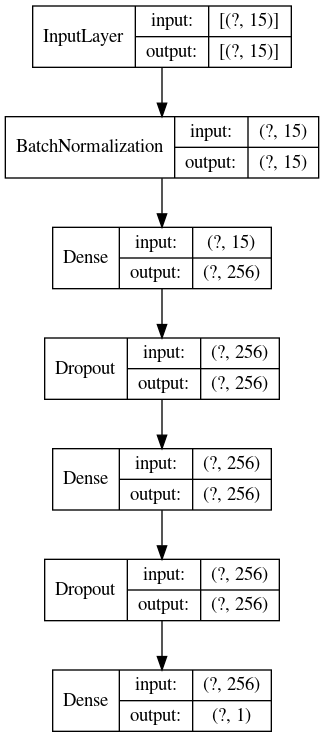

In [31]:
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.backend as K
def create_model(hid_layers ,dropout_rate, lr):
    
    inp1 = tf.keras.layers.Input(shape = (X.shape[1], ))
    x1 = tf.keras.layers.BatchNormalization()(inp1)
    
    for i, units in enumerate(hid_layers):
        x1 = tf.keras.layers.Dense(units, activation='relu')(x1)
        x1 = tf.keras.layers.Dropout(dropout_rate)(x1)    
    x1 = tf.keras.layers.Dense(1, activation='sigmoid')(x1)
    
    model = tf.keras.models.Model(inputs= inp1, outputs= x1)
    
    model.compile(optimizer ="adam", loss='binary_crossentropy', metrics='accuracy')
    
    return model 
    
    
lr=1e-5
hid_layers = [256, 256]
dr = 0.5
model = create_model(hid_layers, dr, lr)

tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names= False,
                          rankdir = 'TB', expand_nested = True)



In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
df_sub_copy = df_sample_sub.copy()
df_sub_copy.loc[:, 'Survived'] = 0.0


scores=[]
fold = 0
for tr, val in KFold(n_splits=5, random_state=42).split(X,y):
    X_train = X[tr]
    X_val = X[val]
    y_train = y[tr]
    y_val = y[val]
    rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 0, 
                                min_delta = 1e-4, min_lr = 1e-6, mode = 'min')
        
    ckp = ModelCheckpoint(f'bests_weights.hdf5', monitor = 'val_loss', verbose = 0, 
                              save_best_only = True, save_weights_only = True, mode = 'min')
        
    es = EarlyStopping(monitor = 'val_loss', min_delta = 1e-4, patience = 15, mode = 'min', 
                           baseline = None, restore_best_weights = True, verbose = 0)
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[rlr,ckp,es],
                        epochs=300, verbose=0)
    scores.append(np.max(history.history['val_accuracy']))
        
    model.load_weights(f'bests_weights.hdf5')
    y_preds_nn = model.predict(X_test)
    df_sub_copy.loc[:, 'Survived'] += y_preds_nn.reshape(-1)
    print(f'fold',str(fold)+':',scores[fold])
    K.clear_session()
    fold+=1
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

fold 0: 0.8379888534545898
fold 1: 0.8314606547355652
fold 2: 0.8483145833015442
fold 3: 0.8146067261695862
fold 4: 0.9101123809814453
Accuracy: 0.85 (+/- 0.07)


In [33]:
# NN submission
df_sample_sub.loc[:, 'Survived'] = (np.round(df_sub_copy.loc[:,'Survived']/ 5)).astype(int)
display(df_sample_sub.head())
df_sample_sub.to_csv('submission4.csv', index=False)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<a id="34"></a>
## Voting Classifier

Here we ask our 5 classifiers to vote for every passenger. The result is probably better than single models.

In [34]:
sub0= pd.read_csv('submission0.csv')
sub1 = pd.read_csv('submission1.csv')
sub2 = pd.read_csv('submission2.csv')
sub3 = pd.read_csv('submission3.csv')
sub4 = pd.read_csv('submission4.csv')

sub_vot = np.round((sub0['Survived']+sub1['Survived']+sub2['Survived']+sub3['Survived']+sub4['Survived'])/5).astype(int)
df_sample_sub.loc[:, 'Survived'] = sub_vot
df_sample_sub.to_csv('submission5.csv', index=False)
display(df_sample_sub.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<a id="4"></a>
<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:red; border:0; color:white' role="tab" aria-controls="home"><center>Summary</center></h2>

In this project, we first performed explanatory data analysis and investigated each feature individually. We engineered two new features out of names and cabin. We filled the missing values based on a reasonable approach. For example, age is filled with median of each group based on their P-class, Sex and Title. After cleaning the dataset, we normalized the data to be in a range of (0,1) and then implemented two machine learning models, Logistic Regression and Ridge classifier, from scratch. We then implemented Logistic Regression, Random Forest and XGBoost using scikit-learn library and a deep neural network using Keras on Tensorflow. We used hyperparameter tuning to find the best parameters for our models, and used KFold cross validation technique. At last, we used a voting classifier to take into account each classifier's output. Please note that different models or feature engineering may result in better outcome.<font size="4"> 
    <b> Please upvote this kernel if it was useful :) </b></font>